In [1]:
#Andrew Weis
#Data Skills Assignment 6
#3 December 2019

import pandas as pd
import bokeh
import matplotlib.pyplot as plt
from bokeh.plotting import figure, show
from bokeh.layouts import gridplot
from ipywidgets import interact, interact_manual

In [2]:
from bokeh.io import output_notebook
output_notebook()

Loading BokehJS ...

In [3]:
PATH='/Users/andrewweis/Documents/GitHub/DataSkills/'
FOLDER='assignment-6-awastro55/'

In [4]:
#Copied this function in part from assignment 1.  
def read_df(files):
    dfs=[]
    for f in files:
        df=pd.read_csv(PATH+FOLDER+f)
        dfs.append(df)
        
    return dfs

In [5]:
#Copied this function from assignment 5.  
def csv_gen(sets,base):
    return base.format(sets)



In [6]:
#Find data types
#Copied this function from assignment 5.  
def check(df):
    return df.dtypes



In [7]:
#Modeled this on similar code from assignment 5.  
csvbase='EducationDataPortal_12.02.2019_{}.csv'
datasets=['datadictionary','institutions','level_of_study','type_of_freshman']
csvlist=[csv_gen(item, csvbase) for item in datasets]
csvlist

['EducationDataPortal_12.02.2019_datadictionary.csv',
 'EducationDataPortal_12.02.2019_institutions.csv',
 'EducationDataPortal_12.02.2019_level_of_study.csv',
 'EducationDataPortal_12.02.2019_type_of_freshman.csv']

In [8]:
education=read_df(csvlist)
education #Gets 4 data frames.  

[                 variable                                       label  \
 0                  unitid                              Unit ID number   
 1          number_applied                        Number of applicants   
 2         number_admitted                        Number of admissions   
 3   sat_crit_read_25_pctl  SAT critical reading 25th percentile score   
 4   sat_crit_read_75_pctl  SAT critical reading 75th percentile score   
 5        sat_math_25_pctl              SAT math 25th percentile score   
 6        sat_math_75_pctl              SAT math 75th percentile score   
 7   act_composite_25_pctl         ACT composite 25th percentile score   
 8   act_composite_75_pctl         ACT composite 75th percentile score   
 9     act_english_25_pctl           ACT english 25th percentile score   
 10    act_english_75_pctl           ACT english 75th percentile score   
 11       act_math_25_pctl              ACT math 25th percentile score   
 12       act_math_75_pctl            

In [9]:
check(education[0])

variable        object
label           object
description     object
source          object
source2        float64
dtype: object

In [10]:
check(education[1])

year                       int64
unitid                     int64
inst_name                 object
state_name                object
number_applied           float64
number_admitted          float64
sat_crit_read_25_pctl    float64
sat_crit_read_75_pctl    float64
sat_math_25_pctl         float64
sat_math_75_pctl         float64
act_composite_25_pctl    float64
act_composite_75_pctl    float64
act_english_25_pctl      float64
act_english_75_pctl      float64
act_math_25_pctl         float64
act_math_75_pctl         float64
inst_control              object
institution_level         object
dtype: object

In [11]:
check(education[2])

year                int64
unitid              int64
inst_name          object
state_name         object
level_of_study     object
enrollment_fall     int64
dtype: object

In [12]:
check(education[3])

year                    int64
unitid                  int64
inst_name              object
state_name             object
state_of_residence     object
type_of_freshman       object
enrollment_fall       float64
dtype: object

In [13]:
#Separate data frames
admit=education[1]
level=education[2]
freshman=education[3]

In [14]:
admit
#freshman

,year,unitid,inst_name,state_name,number_applied,number_admitted,sat_crit_read_25_pctl,sat_crit_read_75_pctl,sat_math_25_pctl,sat_math_75_pctl,act_composite_25_pctl,act_composite_75_pctl,act_english_25_pctl,act_english_75_pctl,act_math_25_pctl,act_math_75_pctl,inst_control,institution_level
0,2016,160959,College of the Atlantic,Maine,485.0,314.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Private not-for-profit,Four or more years
1,2016,160977,Bates College,Maine,5356.0,1213.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Private not-for-profit,Four or more years
2,2016,161004,Bowdoin College,Maine,6799.0,1009.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Private not-for-profit,Four or more years
3,2016,161086,Colby College,Maine,9833.0,1840.0,630.0,725.0,640.0,745.0,30.0,33.0,30.0,34.0,27.0,32.0,Private not-for-profit,Four or more years
4,2016,161217,University of Maine at Augusta,Maine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Public,Four or more years
5,2016,161226,University of Maine at Farmington,Maine,1880.0,1512.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Public,Four or more years
6,2016,161235,University of Maine at Fort Kent,Maine,481.0,392.0,390.0,510.0,400.0,475.0,16.0,22.0,12.0,22.0,16.0,20.0,Public,Four or more years
7,2016,161244,University of Maine at Machias,Maine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Public,Four or more years
8,2016,161253,University of Maine,Maine,12952.0,11625.0,470.0,590.0,480.0,600.0,21.0,26.0,20.0,25.0,20.0,26.0,Public,Four or more years
9,2016,161280,University of Maine-System Central Office,Maine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Public,Four or more years


In [15]:
admit['acceptance_rate']=admit['number_admitted']/admit['number_applied']

In [16]:
colleges=admit.reset_index()['inst_name'].unique()
colleges

array(['College of the Atlantic', 'Bates College', 'Bowdoin College',
       'Colby College', 'University of Maine at Augusta',
       'University of Maine at Farmington',
       'University of Maine at Fort Kent',
       'University of Maine at Machias', 'University of Maine',
       'University of Maine-System Central Office',
       'Maine Maritime Academy', 'University of Maine at Presque Isle',
       'University of New England', 'Maine College of Art',
       "Saint Joseph's College of Maine", 'University of Southern Maine',
       'Thomas College', 'Unity College',
       'Institute for Doctoral Studies in the Visual Arts',
       'Husson University', 'New England School of Communications',
       'Bangor Theological Seminary',
       'University of Maine System Central Office', 'Husson College',
       'New England Baptist Bible College', 'Saint Josephs College',
       'COLLEGE OF THE ATLANTIC', 'BANGOR THEOLOGICAL SEMINARY',
       'BATES COLLEGE', 'BOWDOIN COLLEGE', 'COLBY C

In [17]:
def plot_one_rate(college, color='red', size=8):
    plot = figure(title='Acceptance Rates Over Time For '+college, x_axis_label='Year', 
              y_axis_label='Rate')
    plot.circle(admit[admit['inst_name']==college]['year'], 
                 admit[admit['inst_name']==college]['acceptance_rate'],
              legend=college, fill_color=color, size=size)
    #plot2 = figure(title='Acceptance Rates Over Time For '+college2, x_axis_label='Year', 
     #         y_axis_label='Rate', x
        
    show(plot)
    return(plot)

In [18]:
@interact(college=colleges)
def make_one_plot(college=colleges[2]):
    plot=plot_one_rate(college)
    show(plot)
#colby_plot=plot_one_rate('Colby College')

interactive(children=(Dropdown(description='college', index=2, options=('College of the Atlantic', 'Bates Coll…

In [19]:
def plot_rate(college1, college2, color='red', size=8):
    plot1 = figure(title='Acceptance Rates Over Time For '+college1, x_axis_label='Year', 
              y_axis_label='Rate')
    plot1.circle(admit[admit['inst_name']==college1]['year'], 
                 admit[admit['inst_name']==college1]['acceptance_rate'],
              legend=college1, fill_color=color, size=size)
    plot2 = figure(title='Acceptance Rates Over Time For '+college2, x_axis_label='Year', 
              y_axis_label='Rate', x_range=plot1.x_range, y_range=plot1.y_range)
    plot2.circle(admit[admit['inst_name']==college2]['year'], 
                 admit[admit['inst_name']==college2]['acceptance_rate'],
              legend=college2, fill_color=color, size=size)
    plot=gridplot([[plot1],[plot2]])
    show(plot)
    return(plot)


In [20]:
@interact(college1=colleges, college2=colleges)#colleges=admit['inst_name'])
def make_rate_plot(college1=colleges[2],college2=colleges[3]):
    plot=plot_rate(college1, college2)
    show(plot)

interactive(children=(Dropdown(description='college1', index=2, options=('College of the Atlantic', 'Bates Col…

In [21]:
bowdoin_plot=plot_rate('Bowdoin College', 'Colby College', color='blue', size=12)
bowdoin_plot

#This confirms the plot_rate function is fine.  When I make it interactive, somehow
#the interactivity part creates duplicate plots.  

Column(id='1596', ...)

In [22]:
def plot_residence(college,df):
    counts=df[df['inst_name']==college]['state_of_residence'].value_counts()
    plot=figure(title='Residents by State For '+college, x_axis_label='State', 
              y_axis_label='Number', 
                x_range=df.reset_index()['state_of_residence'].unique())
    plot.vbar(x=df['state_of_residence'], top=counts, width=0.4)
    show(plot)
    return plot

In [23]:
res=plot_residence('Bowdoin College',freshman)

In [47]:
states=freshman['state_of_residence'].value_counts()
states

#Checking the residency counts for the overall data frame.  

Total                                    508
US total                                 482
Maine                                    482
New Hampshire                            454
Massachusetts                            448
Connecticut                              436
New York                                 418
Vermont                                  406
New Jersey                               388
Rhode Island                             384
Foreign countries                        344
Pennsylvania                             332
Florida                                  298
Maryland                                 286
California                               272
Virginia                                 254
Texas                                    254
Ohio                                     246
Illinois                                 244
Minnesota                                218
Michigan                                 218
Colorado                                 198
Georgia   

In [25]:
bowdoin_res=freshman[freshman['inst_name']=='Bowdoin College']['state_of_residence'].value_counts()
bowdoin_res

#Something feels wrong here.  It seems highly improbable that there are exactly 24 students
#from that many states. I am not sure what the issue is.  

Florida                 24
Massachusetts           24
District of Columbia    24
Arizona                 24
Texas                   24
California              24
Maryland                24
Colorado                24
Vermont                 24
Pennsylvania            24
New Hampshire           24
US total                24
Connecticut             24
Georgia                 24
New York                24
Illinois                24
Tennessee               24
New Jersey              24
Missouri                24
Total                   24
Ohio                    24
Virginia                24
Minnesota               24
Maine                   24
Washington              24
Foreign countries       24
Rhode Island            24
Michigan                22
Wisconsin               22
Oregon                  22
North Carolina          22
Alaska                  20
Idaho                   20
Oklahoma                18
New Mexico              18
Montana                 18
Mississippi             16
I

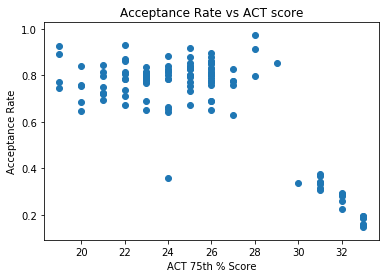

In [24]:
admit_subset=admit[admit['acceptance_rate'] >= 0.0]
#admit_subset
plt.title('Acceptance Rate vs ACT score')
plt.xlabel("ACT 75th % Score")
plt.ylabel("Acceptance Rate")
plt.scatter(admit_subset['act_composite_75_pctl'], admit_subset['acceptance_rate'])#,
           #label='Acceptance Rate vs ACT score')

I was able to copy, in whole or part, some functions from prior assignments.  These were
mostly the ones that read in the data.  The CSV function, for instance, generalized well and
I could transfer that completely over from assignment 5.  That gave me the name of each CSV
file that I could then put into a list.  I copied the function that reads the csv files into
a data frame partially from assignment 1, where we also did this.  I couldn't copy the whole
thing since that function contained variables specific to those data sets. I omitted those 
lines.  Also, the function from assignment 1 concatenated all the data frames into one, which
this does not do.  

The plotting code I had to largely write fresh.  I was unable to get plotting code to work on
the prior assignment, 5.  While I had reviewed the lecture code, when I tried to translate that over to my assignment, I could not get functional plots.  For this assignment, though, I
figured out what to do.  

I am suspicious of the residence plot; the values are too similar for each college.  I haven't found an error in my code yet; I will keep looking but wonder if there is an issue with the data.  